2023-1 ML 교육세션 실습 자료를 참고했습니다.

In [3]:
# 데이터셋 불러오기
# spaceship_tt.csv 데이터프레임을 이용해, "Transported"값을 분류 대상으로 삼는 decision tree classifier 만들기
import numpy as np
import pandas as pd
df = pd.read_csv('spaceship_tt.csv')

In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId : 승객 ID

HomePlanet : 출발 행성(거주지)

CryoSleep : 취침 방식 여부

Cabin : 객실 종류 및 번호 (port : 좌현, starboard : 우현)

Destination : 목적지

Age : 승객의 나이

VIP : 승객의 VIP 서비스 유무

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck : 승객이 해당 서비스에 대해 지불한 금액

Name : 이름

Transported : 도착 여부

In [5]:
# 모델 라이브러리 import
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
# base dataframe
df_base=df[['CryoSleep','Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Transported']]

In [7]:
df_base.dropna(inplace=True)

<ipython-input-7-3c1dfc79aac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.dropna(inplace=True)


In [8]:
df_base

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [9]:
# Model build
dt_clf = DecisionTreeClassifier(random_state=111)

# Train/test split 진행 (7:3)
X_train, X_test, y_train, y_test = train_test_split(df_base.drop('Transported',axis=1),
                                                    df_base['Transported'], # target variable = Transported
                                                    test_size=0.3, random_state=111)
# 모델 훈련
dt_clf = dt_clf.fit(X_train,y_train)

In [10]:
X_train

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
5664,False,10.0,False,0.0,0.0,0.0,0.0,0.0
6303,False,28.0,False,32.0,0.0,304.0,291.0,2.0
963,False,0.0,False,0.0,0.0,0.0,0.0,0.0
6375,False,21.0,False,1244.0,0.0,1119.0,0.0,3.0
8299,False,34.0,False,0.0,3126.0,0.0,112.0,15.0
...,...,...,...,...,...,...,...,...
5017,True,38.0,False,0.0,0.0,0.0,0.0,0.0
5787,False,33.0,True,0.0,3095.0,0.0,197.0,40.0
2429,True,34.0,False,0.0,0.0,0.0,0.0,0.0
8421,False,39.0,False,2101.0,41.0,0.0,525.0,19.0


In [11]:
# 평가지표 출력
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.7601102941176471


# 다양한 모델을 통한 평가

In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
# n_estimators를 변경 가능
# 모델별로 추가 parameter 튜닝 가능
rf_reg = RandomForestRegressor(n_estimators=200)
gbm_reg = GradientBoostingRegressor(n_estimators=200)
xgb_reg = XGBRegressor(n_estimators=200)
lgbm_reg = LGBMRegressor(n_estimators=200)

In [13]:
model = rf_reg  # random forest


# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환하는 함수 정의
from sklearn.metrics import mean_squared_error # regressor를 위한 평가 지표
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    mse = mean_squared_error(y_test, pred)

    print('###', model.__class__.__name__, '###')
    print('Mean Squared Error:', mse)


In [14]:
get_model_predict(model,X_train, X_test, y_train, y_test, is_expm1=True)

### RandomForestRegressor ###
Mean Squared Error: 0.46932707517048117


In [15]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=False):
    model1.fit(X_train, y_train)
    model1_pred = model1.predict(X_test)
    model2.fit(X_train, y_train)
    model2_pred = model2.predict(X_test)

    pred = 0.4*model1_pred + 0.6*model2_pred # 각 모델의 반영 가중치 설정

    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred)

    print('### Two Models ###')
    print('Mean Squared Error:', mse)

In [16]:
model1 = rf_reg
model2 = gbm_reg  # GBM Model (Boosting)

get_two_models_predict(model1, model2, X_train, X_test, y_train, y_test, is_expm1=True)


### Two Models ###
Mean Squared Error: 0.4512166469923443


## 두 과제를 "ML_과제_(이름).ipynb" 의 파일명으로 제출해 주세요!


### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

Dataset을 Grouping한다는 것은 데이터셋 내의 데이터 포인트들을 특정 기준이나 속성에 따라 여러 하위 그룹으로 나누는 과정을 의미합니다. 세션에서 배운바에 따르면 Grouping을 위한 두 수단으로는 먼저 데이터의 특징들을 통해 데이터 집합을 생성하는 방법인 군집화와 데이터의 직관적 해석 크기를 축소하는 차원축소가 있습니다. 군집화의 예시모델로는 K-Means Clustering, Hierarchical Clustering, DBSCAN등의 방법들이 있는데 이중 K-Means Clustering은 대표적인 군집화 방법인데 군집의 중심을 반복하여 업데이트하며 데이터 포인트들을 가장 가까운 군집에 배정하는 방법입니다. 또한 Hierarchical Clustering는 데이터를 계층적 트리 구조로 그룹화하는 방식이고, DBSCAN는 밀도기반의 군집화방식으로 밀도가 높은 영역의 데이터 포인트들을 그룹화하고, 밀도가 낮은 영역의 데이터 포인트는 제외하는 방식으로 군집화를 진행합니다.
다음으로 차원축소의 예시모델로는 주성분 분석(PCA), t-분포 확률적 이웃 임베딩(t-SNE), 선형 판별 분석(LDA)등이 있습니다. PCA는 데이터의 분산을 최대로 유지하면서 고차원 데이터를 저차원으로 투영하는 방법이고 t-SNE는 저차원 공간에서 비슷한 성질을 가진 데이터 포인트들을 가깝게 배치하고 반대로 상이한 데이터 포인트들을 멀리 배치하는 방법입니다. 다음으로 LDA는 클래스 간의 분별력을 최대화하는 방향으로 차원을 축소하는 방법입니다.

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [17]:
dataframe = pd.read_csv('diabetes.csv')

In [18]:
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
dataframe.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
X = dataframe[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataframe['Outcome']

In [30]:
dataframe_dtc = DecisionTreeClassifier(random_state=11)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('Outcome',axis=1),
                                                    dataframe['Outcome'],
                                                    test_size=0.4, random_state=11)

In [32]:
dataframe_dtc = dataframe_dtc.fit(X_train,y_train)

In [33]:
feature_importances = dataframe_dtc.feature_importances_

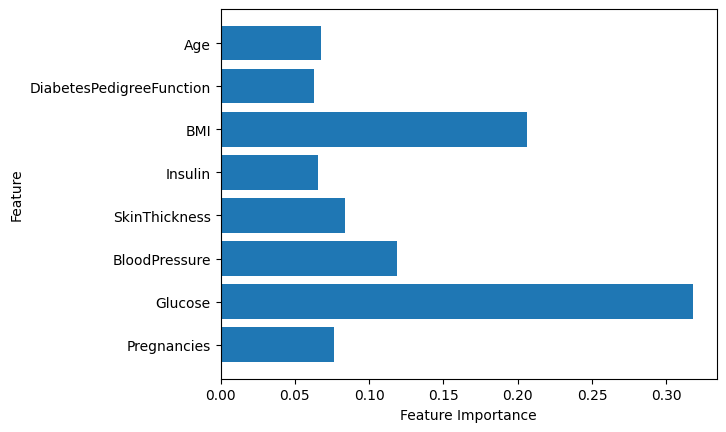

In [35]:
import matplotlib.pyplot as plt
features = X.columns
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
381,0,105,68,22,0,20.0,0.236,22
654,1,106,70,28,135,34.2,0.142,22
262,4,95,70,32,0,32.1,0.612,24
270,10,101,86,37,0,45.6,1.136,38
551,3,84,68,30,106,31.9,0.591,25
...,...,...,...,...,...,...,...,...
269,2,146,0,0,0,27.5,0.240,28
337,5,115,76,0,0,31.2,0.343,44
91,4,123,80,15,176,32.0,0.443,34
80,3,113,44,13,0,22.4,0.140,22


In [37]:
prediction = dataframe_dtc.predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.685064935064935
